In [2]:
import numpy as np 
import pandas as pd 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

import string, nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\84969\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\84969\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

train = pd.read_csv('train.csv', encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')

In [6]:
train.isnull().sum()

id         0
keyword    0
text       0
target     0
dtype: int64

In [7]:
train = train.drop(columns = ['keyword'])
train.dtypes

id         int64
text      object
target     int64
dtype: object

In [8]:
train 

,id,text,target
0,1,@WoodyLightyearx Mainnet mở 14/3/2023 là mốc l...,1
1,3,Chúc các phu nhân đc lì xì nhìu nhìu tiền zô n...,0
2,4,@LamNguy40552955 Dân Thanh Hoá ngày trước nghè...,1
3,5,"Bão lũ, cháy rừng gây thiệt hại trên 353 tỷ US...",1
4,6,@wwwaenii Mấy con đin này lại kỳ thị Việt kiều...,0
...,...,...,...
816,1016,WHO phát đi môṭ thông điệp cảnh báo thế giới đ...,1
817,1018,Các hành tinh xếp thẳng hàng cùng với sự xuất ...,1
818,1020,"""Chính phủ có kế hoạch thực hiện """"đánh giá rủ...",1
819,1021,@ZelenskyyUa Cái ý thức tập thể của mấy người ...,1


In [9]:
train.describe()

,id,target
count,821.000000,821.000000
mean,512.590743,0.539586
std,296.586068,0.498734
min,1.000000,0.000000
25%,255.000000,0.000000
50%,514.000000,1.000000
75%,772.000000,1.000000
max,1022.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      821 non-null    int64 
 1   text    821 non-null    object
 2   target  821 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.4+ KB


In [11]:
train.isnull().sum()

id        0
text      0
target    0
dtype: int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       201 non-null    int64 
 1   keyword  201 non-null    object
 2   text     201 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [13]:
test.sample(10)

,id,keyword,text
191,978,tai nạn,@phungduthinh @PhcTrnMinh9 @hokhoaly Trong 7 n...
46,241,cấp cứu,@LocThuong20 @lechauphuongtu Khiên đi cấp cứu ...
39,208,cấp cứu,Hôm đó mà mình cũng mở live nhào lộn 8 chục vò...
63,324,hỏa hoạn,Thất bại của Nga trong cuộc chiến tranh xâm lư...
21,122,bão lũ,Kiếm hoài cái bài LẦN ĐẦU TIÊN nhận được KHI C...
165,826,lốc xoáy,Số người chết do lốc xoáy tại Mỹ tăng lên 83 h...
144,721,lốc xoáy,:)))))))) zúng tom &amp; jerry chạy có lốc xoáy
37,200,cấp cứu,@zpoimy_zpoimy má nó mày chăm ah tao đàng quàn...
3,17,bão lũ,"Hà nội dần chuyển lạnh rồi, để cái bếp lửa ở đ..."
117,582,lốc xoáy,Điều kiện bão mạnh đến nghiêm trọng sẽ tiếp tụ...


In [14]:
test.isnull().sum()

id         0
keyword    0
text       0
dtype: int64

In [15]:
train['target'].value_counts()

1    443
0    378
Name: target, dtype: int64

In [16]:
print(f"Tweets that does not contain information about disaster :\n\n {train.loc[train['target']==0,'text'][20:30].values}", end="\n")

print()

print(f"Tweets that contains information about disaster :\n\n {train.loc[train['target']==1,'text'][20:30].values}", end="\n")

Tweets that does not contain information about disaster :

 ['@dungnguyen242 mùa bão lũ này thì đúng lội theo nghĩa đen luôn đấy, lội vui vẻ, lội cẩn thận bạn ưi\U0001f979'
 '@Naan0105 thông cảm, bên Hàn đang mùa bão lũ, ko tìm ra nắng đẹp trời trong xanh nên gom hết vào hộp. 🥲'
 'https://t.co/ZDVrWxZd36\ndạo này nhiều chuyện buồn quá, ngày càng thương Bin huhu. cái đợt fanmeeting này là haloween này đợt đó còn bão lũ các kiểu, trời thì mưa, đang bận tổ chức haloween trên trường thế là phải lấy cớ nhà bận để về trước huhu nhớ lắm'
 '@RyanNguyenHC Mình miền Trung nè, do hoàn cảnh từ nhỏ sinh ra cha mẹ nói phải tiết kiệm nên mình cũng hạn chế ăn chơi, ng miền Tây địa lý phong phú, 1 năm cũng chịu ít bão lũ càn quét nên tính họ đa số phóng khoán. Đâu cũng có người này người kia, miễn sống tốt bụng là đc.'
 'Giải cứu fan zxyn ét ô ét trời má emo như bão lũ luôn á. Liệu làm sao coi cho đc thì làm nhaaaaaa'
 '2022/07/25 14:02 \n[COMEBACK LOL NGÀY MƯA BÃO LŨ]\nTôi đang phát trực tuyến League 

In [17]:
def preprocessing(text):
    text = text.lower()
    pattern = re.compile('[^a-z]')
    words = nltk.word_tokenize(text)
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [18]:
def remove_punctuation(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)
    

In [19]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

In [20]:
def remove_stopwords(text, filename):
    with open(filename, 'r') as f:
        words_to_remove = set(f.read().splitlines())
    words = text.split()
    cleaned_words = [word for word in words if word not in words_to_remove]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [21]:
filename = 'vietnamese-stopwords.txt'
train['text_cleaned']=train['text'].apply(preprocessing).apply(remove_urls).apply(remove_punctuation).apply(remove_stopwords, args=(filename,))
test['text_cleaned']=test['text'].apply(preprocessing).apply(remove_urls).apply(remove_punctuation).apply(remove_stopwords, args=(filename,))
train


,id,text,target,text_cleaned
0,1,@WoodyLightyearx Mainnet mở 14/3/2023 là mốc l...,1,woodylightyearx mainnet 1432023 mốc lịch sử tr...
1,3,Chúc các phu nhân đc lì xì nhìu nhìu tiền zô n...,0,chúc phu nhân đc lì xì nhìu nhìu tiền zô bão l...
2,4,@LamNguy40552955 Dân Thanh Hoá ngày trước nghè...,1,lamnguy40552955 dân hoá nghèo lắm hậu khắc ngh...
3,5,"Bão lũ, cháy rừng gây thiệt hại trên 353 tỷ US...",1,bão lũ cháy rừng thiệt hại 353 tỷ usd 2022 tco...
4,6,@wwwaenii Mấy con đin này lại kỳ thị Việt kiều...,0,wwwaenii mấy đin kỳ thị việt kiều đ bão lũ hội...
...,...,...,...,...
816,1016,WHO phát đi môṭ thông điệp cảnh báo thế giới đ...,1,who phát đi môṭ thông điệp cảnh báo giới
817,1018,Các hành tinh xếp thẳng hàng cùng với sự xuất ...,1,hành tinh xếp thẳng hàng xuất hiện
818,1020,"""Chính phủ có kế hoạch thực hiện """"đánh giá rủ...",1,phủ kế hoạch thực hiện đánh giá rủi ro
819,1021,@ZelenskyyUa Cái ý thức tập thể của mấy người ...,1,zelenskyyua thức tập thể mấy


In [22]:
test

,id,keyword,text,text_cleaned
0,2,bão lũ,@Wendy_851 Ngày trc táo bón nên chưa xả đc. Gi...,wendy851 trc táo bón xả đc đc dịp xả bão lũ
1,9,bão lũ,@nagai_yue Lời bài Heather conan gray\nThánh c...,nagaiyue heather conan gray thánh ca mùa đông ...
2,11,bão lũ,Hoa Kỳ và chiến dịch cứu trợ đồng bào lũ lụt V...,hoa kỳ chiến dịch cứu trợ đồng bào lũ lụt việt...
3,17,bão lũ,"Hà nội dần chuyển lạnh rồi, để cái bếp lửa ở đ...",hà nội dần lạnh bếp lửa ấm áp nè mong ảnh hưởn...
4,21,bão lũ,@MarkTin_ Ngon ngon thanks a nhé. Bão lũ mà vẫ...,marktin ngon ngon thanks a bão lũ
...,...,...,...,...
196,1002,thảm hỏa,"""quay về với cherry bomb thôi"" 1 cô nương nào ...",cherry bomb 1 nương đcm 2017 cherry bomb coi t...
197,1008,thảm hỏa,Các hành tinh xếp thẳng hàng cùng với sự xuất ...,hành tinh xếp thẳng hàng xuất hiện chỗi chu kỳ...
198,1010,thảm hỏa,đi trong nhà mà không có dép là một thảm họa,đi dép thảm họa
199,1017,thảm họa,Đi trong nhà mà không có dép là một thảm họa,đi dép thảm họa


In [23]:
x=train['text_cleaned'].values
y=train['target'].values

In [24]:
classifier=CountVectorizer()
x=classifier.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=27,stratify=y)

In [26]:
vocabulary = classifier.get_feature_names_out()
word_counts = x.sum(axis=0)
word_freqs = [(word, count) for word, count in zip(vocabulary, word_counts.tolist()[0])]
sorted_word_freqs = sorted(word_freqs, key=lambda x: x[1], reverse=True)
top_10_words = sorted_word_freqs[:10]
for word, count in top_10_words:
    print(f"{word}: {count}")

lốc: 305
xoáy: 305
bố: 194
khủng: 188
bão: 175
lũ: 168
cứu: 98
mỹ: 84
trung: 82
đi: 82


In [27]:
average_length = x.mean(axis=1)
print("Độ dài trung bình của các dòng dữ liệu:")
print(average_length)

Độ dài trung bình của các dòng dữ liệu:
[[0.01031223]
 [0.00429676]
 [0.00859353]
 [0.00315096]
 [0.00887998]
 [0.00887998]
 [0.00658837]
 [0.00286451]
 [0.00515612]
 [0.00401031]
 [0.00257806]
 [0.00143225]
 [0.00286451]
 [0.00257806]
 [0.00601547]
 [0.00286451]
 [0.00315096]
 [0.00372386]
 [0.00887998]
 [0.00802062]
 [0.00372386]
 [0.00458321]
 [0.01059868]
 [0.00229161]
 [0.00372386]
 [0.00171871]
 [0.00401031]
 [0.00372386]
 [0.00773417]
 [0.00544257]
 [0.00744772]
 [0.00171871]
 [0.00716127]
 [0.01002578]
 [0.00200516]
 [0.00286451]
 [0.00171871]
 [0.01174449]
 [0.00343741]
 [0.00257806]
 [0.00171871]
 [0.01145803]
 [0.00486966]
 [0.00515612]
 [0.00315096]
 [0.00315096]
 [0.00343741]
 [0.00286451]
 [0.00315096]
 [0.00143225]
 [0.00315096]
 [0.00429676]
 [0.00716127]
 [0.00401031]
 [0.00257806]
 [0.00429676]
 [0.00401031]
 [0.00687482]
 [0.00486966]
 [0.00887998]
 [0.00486966]
 [0.00458321]
 [0.00458321]
 [0.00372386]
 [0.00429676]
 [0.00429676]
 [0.00429676]
 [0.00429676]
 [0.0071

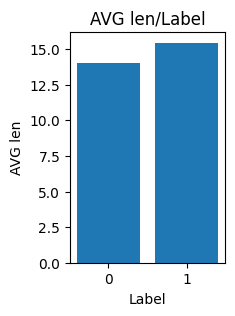

In [28]:
import numpy as np
import matplotlib.pyplot as plt
labels = train['target'].unique()
average_lengths = []
for label in labels:
    group_indices = (y == label)
    group_x = x[group_indices]
    group_average_length = np.mean([group_x[i].getnnz() for i in range(group_x.shape[0])])
    average_lengths.append(group_average_length)
plt.figure(figsize=(2, 3))
plt.bar(labels, average_lengths)
plt.xlabel('Label')
plt.ylabel('AVG len')
plt.title('AVG len/Label')
plt.show()

In [29]:
print(average_lengths)

[15.451467268623025, 14.023809523809524]


In [30]:
vocab = classifier.vocabulary_
print("Vocab:", list(vocab.keys()))
print("Feature matrix:")
print(x.toarray())
df_c = x.toarray()

Vocab: ['woodylightyearx', 'mainnet', '1432023', 'mốc', 'lịch', 'sử', 'trọng', 'đại', 'cứu', 'cánh', 'nhân', 'văn', 'nghĩa', 'vĩ', 'dịch', 'bệnh', 'covit19', 'hoành', 'hành', 'chiến', 'tranh', 'bão', 'lũ', 'thiên', 'tai', 'động', 'đất', 'bình', 'yên', 'hưởng', 'thụ', 'pi', 'thời', 'gian', 'chúc', 'phu', 'đc', 'lì', 'xì', 'nhìu', 'tiền', 'zô', 'đánh', 'thắng', 'quài', 'lamnguy40552955', 'dân', 'hoá', 'nghèo', 'lắm', 'hậu', 'khắc', 'nghiệt', 'mùa', 'qoanh', 'lúa', 'gộp', 'hạn', 'hán', 'ngập', 'úngdân', 'th', 'đói', 'quanh', 'lớp', 'tỏa', 'đi', 'khắp', 'miền', 'cháy', 'rừng', 'thiệt', 'hại', '353', 'tỷ', 'usd', '2022', 'tcolxyjmn2g9l', 'wwwaenii', 'mấy', 'đin', 'kỳ', 'thị', 'việt', 'kiều', 'hội', 'thiện', 'lô', 'vinfast', 'mẽo', 'hầu', 'toàn', 'vk', 'ủng', 'hộ', 'gửi', 'ngoại', 'tệ', 'gd', 'xây', 'dựng', 'quê', 'hương', 'đừng', 'mong', 'ước', 'đời', 'sóng', 'gió', 'tiểu', 'thuyết', 'phim', 'truyền', 'hình', 'giật', '10', '11', 'tầm', 'trông', 'học', 'đầu', 'aswalrmm', 'maedangyeu', 'justl

In [31]:
vocab = classifier.vocabulary_
word_count = len(vocab)
print("Số từ trong vocab:", word_count)

Số từ trong vocab: 3491


In [32]:
df_a = pd.concat([test[['text_cleaned']]], axis=1)

# In kết quả bảng A
print(df_a)

                                          text_cleaned
0          wendy851 trc táo bón xả đc đc dịp xả bão lũ
1    nagaiyue heather conan gray thánh ca mùa đông ...
2    hoa kỳ chiến dịch cứu trợ đồng bào lũ lụt việt...
3    hà nội dần lạnh bếp lửa ấm áp nè mong ảnh hưởn...
4                    marktin ngon ngon thanks a bão lũ
..                                                 ...
196  cherry bomb 1 nương đcm 2017 cherry bomb coi t...
197  hành tinh xếp thẳng hàng xuất hiện chỗi chu kỳ...
198                                    đi dép thảm họa
199                                    đi dép thảm họa
200                                    thảm hoạ zombie

[201 rows x 1 columns]


In [33]:
logReg=LogisticRegression(penalty='l2')
logReg.fit(x_train,y_train)

LogisticRegression()

In [34]:
R=logReg.predict(x_train)
accuracy_score(y_train,R)

0.989159891598916

## Support Vector Classifier

In [35]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [36]:
pred=logReg.predict(x_test)

In [37]:
accuracy_score(y_test,pred)

0.8554216867469879

In [38]:
y_pre=svc_model.predict(x_test)

In [39]:
score=accuracy_score(y_test,y_pre,normalize=True)
print(score)

0.8554216867469879


In [40]:
x=classifier.transform(test['text'])

In [41]:
predictions=svc_model.predict(x)

In [44]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Mean Square Error is: ", mse(y_test, pred))
print("F1 Score is: ", f1_score(y_test, pred))
print("R Square score is: ", r2_score(y_test, pred))
print("Accuracy score is ", accuracy_score(y_test, pred))
print(f"Accuracy score is {((accuracy_score(y_test, pred))*100).round(2)}%")

Confusion Matrix:
[[33  5]
 [ 7 38]]
Mean Square Error is:  0.14457831325301204
F1 Score is:  0.8636363636363636
R Square score is:  0.4175438596491229
Accuracy score is  0.8554216867469879
Accuracy score is 85.54%


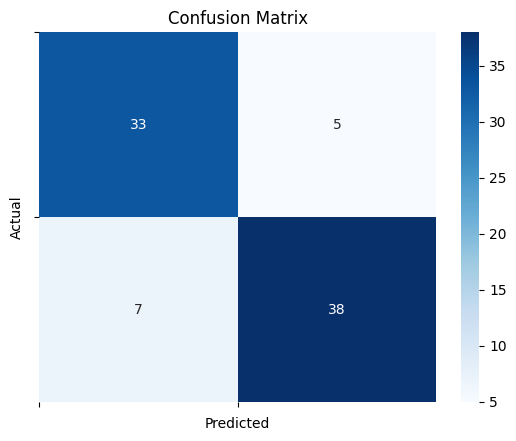

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0, 1])  # Set x-axis tick locations
plt.yticks(ticks=[0, 1])  # Set y-axis tick locations

# Display the plot
plt.show()

In [43]:
submission = pd.DataFrame({'id':test['id'],'target':predictions})
submission.to_csv('submission.csv',index=False)